In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("breast_cancer_wisconsin.txt",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

### Rename column names

In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df.drop(columns=['Id'], inplace=True)
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
print(df['Bare_Nuclei'].unique())
df.dtypes
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.dtypes

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

### Checking missing values

In [9]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
print(round(df.describe(), 2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

# Data Visualization

<Figure size 4000x2000 with 0 Axes>

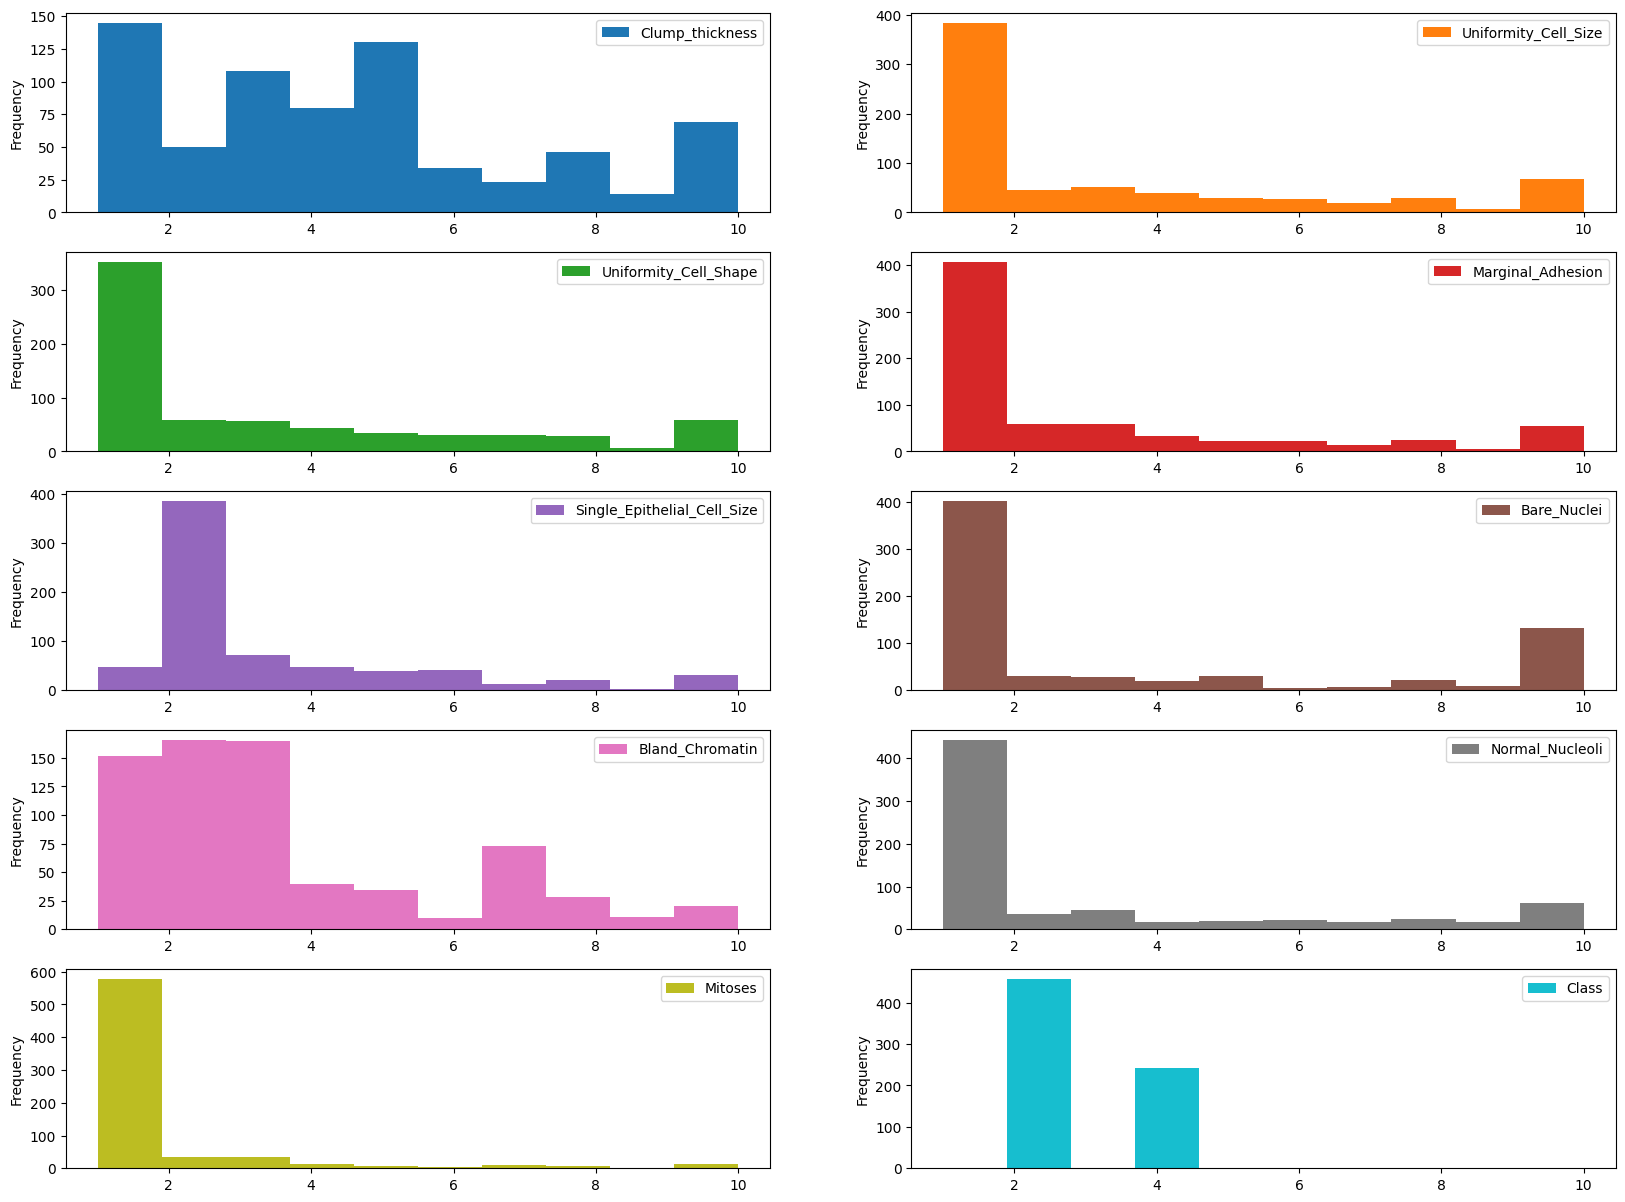

In [12]:
# plotting histograms

plt.figure(figsize=(40, 20))
df.plot(kind = 'hist', subplots = True, layout = (5, 2), figsize= (20, 15), bins = 10, sharex = False, sharey = False)
plt.show()

In [13]:
correlation = df.corr()

In [14]:
correlation["Class"].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

### Correlation heatmap

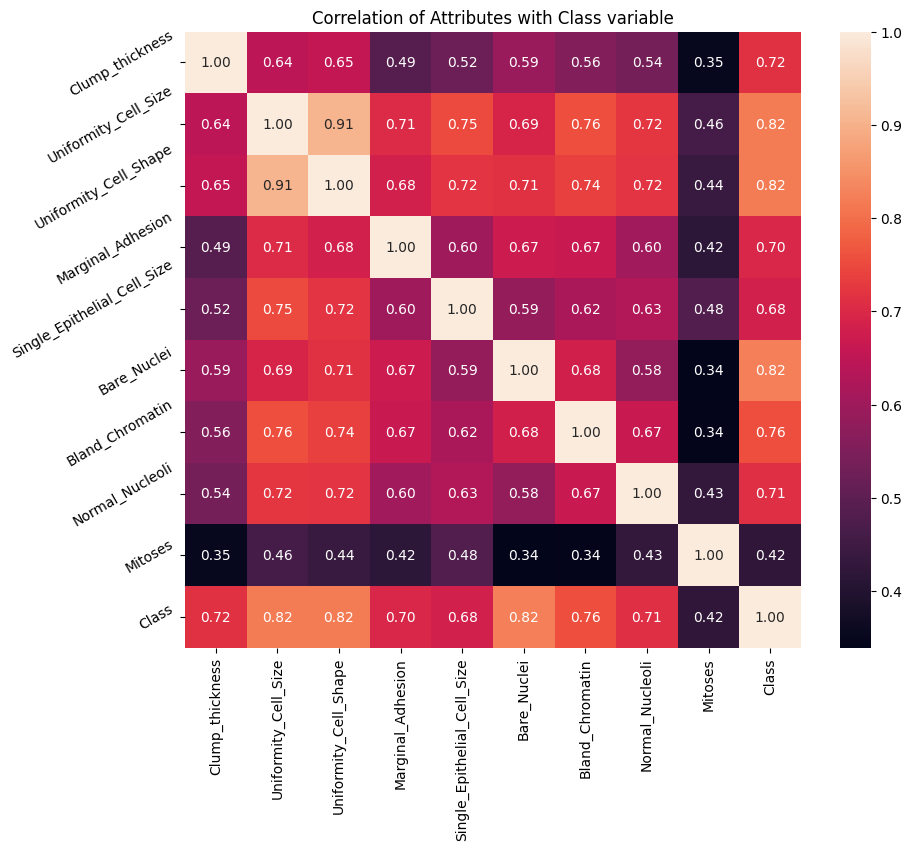

In [15]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Dropping the target variable

In [16]:
X = df.drop(columns=['Class'])
y = df['Class']

### Splitting the data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 9), (140, 9), (559,), (140,))

### Feature Engineering

In [20]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    11
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [21]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    5
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [23]:
for col in X_train.columns:
    if X_train[col].isnull().sum() > 0:
        print(col, round(X_train[col].isnull().sum()/X_train.shape[0], 4))

Bare_Nuclei 0.0197


In [26]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64


# Scalling the data (Feature Scaling)

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [30]:
X_train.head(20)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,0.113334,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
5,1.917192,2.244979,2.229201,1.453765,2.538445,1.737788,1.429578,2.379893,4.794900
6,-0.536036,-0.383175,-0.428487,-0.293128,-0.554964,-0.698893,0.219991,-0.270227,-0.349724
7,1.216270,1.259422,1.564779,1.453765,0.770783,0.384076,0.623186,2.379893,0.221901
8,-0.536036,-0.711694,0.235935,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
9,1.917192,1.259422,1.232568,1.104387,0.328867,1.737788,0.219991,-0.601492,0.221901


### Fitting K Neighbours Classifier to the training set

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[94  1]
 [ 3 42]]


In [33]:
knn.predict_proba(X_test)[:10]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



In [35]:
print('Model accuracy: ', round(accuracy_score(y_test, y_pred), 4))

Model accuracy:  0.9714


In [36]:
y_pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))

[[355   8]
 [  3 193]]


In [38]:
print("training accuracy: ", round(accuracy_score(y_train, y_pred_train), 4))
print("training accuracy: ", knn.score(X_train, y_train))

training accuracy:  0.9803
training accuracy:  0.9803220035778175


### Check for underfitting and overfitting 

In [39]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_train))

0.9714285714285714
0.9803220035778175


# Null accuracy
Null accuracy is the accuracy that can be achieved by always predicting the most frequent class in the dataset. It serves as a baseline for evaluating the performance of a classification model. If a model's accuracy is significantly higher than the null accuracy, it indicates that the model is effectively capturing patterns in the data and making meaningful predictions.

In [41]:
y_test.value_counts()

Class
2    95
4    45
Name: count, dtype: int64

In [42]:
null_accuracy = y_test.value_counts().max() / y_test.shape[0]
print("Null accuracy: ", round(null_accuracy, 4))

Null accuracy:  0.6786


In [44]:
print(accuracy_score(y_test, y_pred))

0.9714285714285714


Significantly higher accuracy than null accuracy indicates that the model is effectively capturing patterns in the data and making meaningful predictions. If the model's accuracy is close to or lower than the null accuracy, it suggests that the model may not be learning from the data and is simply predicting the majority class.

### Employing GridSearchCV to find the best hyperparameters

We will use GridSearchCV to find the best hyperparameters for the K Neighbours Classifier. GridSearchCV performs an exhaustive search over a specified parameter grid and evaluates the model's performance using cross-validation. It helps identify the optimal combination of hyperparameters that yield the best results.

In [47]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the training set
best_knn = grid_search.best_estimator_
train_accuracy = best_knn.score(X_train, y_train)
print("Train set accuracy with best parameters:", train_accuracy)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score: 0.9641731016731017
Train set accuracy with best parameters: 0.9660107334525939
Test set accuracy with best parameters: 0.9714285714285714


We see that the best hyperparameters are:
- n_neighbors: 5
- metric: 'euclidean'
- weights: 'uniform'
Also there is no significant difference between the training and testing accuracy, indicating that the model is not overfitting or underfitting. And the grid search cv does not make a significant difference in the accuracy of the model. The accuracy is still around 98% for testing sets. And there is a decrease in the accuracy of the training set. This is because the grid search cv is trying to find the best hyperparameters for the model and it is not overfitting to the training set. The accuracy of the model is still very high and it is not overfitting or underfitting. The model is performing well on both the training and testing sets.

### Confusion Matrix

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print('\n True Positives: ', cm[1][1])
print('\n True Negatives: ', cm[0][0])
print('\n False Positives: ', cm[0][1])
print('\n False Negatives: ', cm[1][0])


[[94  1]
 [ 3 42]]
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140


 True Positives:  42

 True Negatives:  94

 False Positives:  1

 False Negatives:  3


The confusion matrix shows 42 + 94 = 136 correct predictions and 1 + 3 = 4 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 94
* True Negatives (Actual Negative:0 and Predict Negative:0) - 42
* False Positives (Actual Negative:0 but Predict Positive:1) - 1 `(Type I error)`
* False Negatives (Actual Positive:1 but Predict Negative:0) - 3 `(Type II error)`

<Axes: >

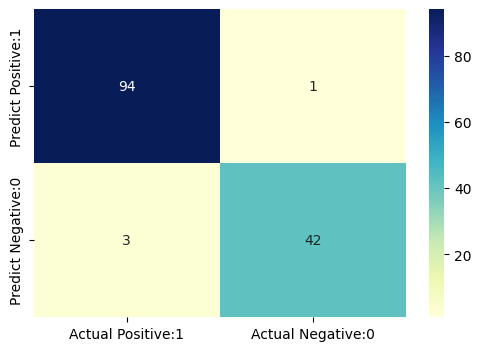

In [54]:
# Heatmap for the confusion matrix
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## ROC and AUC curve

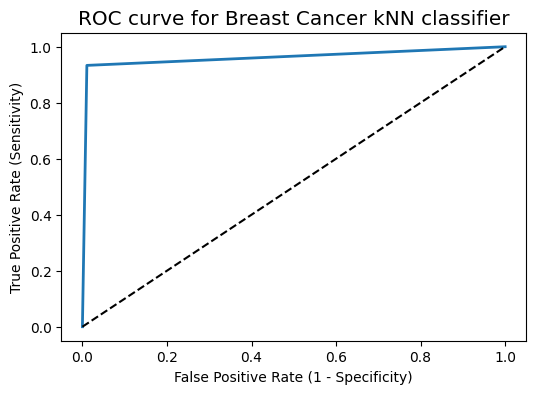

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [56]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9614


In [58]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9825


# This marks the end of the notebook.